### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

In [464]:
import pandas as pd
ue_data = pd.read_csv('Exploration.csv')
ue_data = ue_data.drop(columns=['Unnamed: 0', 'anime_id'])
ue_data

,title,type,source,episodes,rating,score,producer,studio,genre,release_season,is_licensed,nr_synonyms,min_duration,op_artists,ed_artists
0,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen",Winter,True,1,24.0,MUCC,"MUCC,:, Ririchiyo Shirakiin (Rina Hidaka),:, K..."
1,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen",Spring,True,1,24.0,SUN&LUNAR,"Asuka Hinoi (1-13, 26)"
2,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo",Fall,True,2,24.0,"Shugo Chara Egg,:, Guardians 4","Buono!,:, Buono!"
3,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",Summer,True,0,16.0,Ritsuko Okazaki,Ritsuko Okazaki
4,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen",Fall,True,1,24.0,nano.RIPE,"Sphere,:, nano.RIPE"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14137,Minna no Taabou Konnichiwa,OVA,Original,1,G - All Ages,6.75,Sanrio,NaN,Kids,NaN,False,0,20.0,NaN,NaN
14138,Gutchonpa Omoshiro Hanashi,TV,Unknown,5,G - All Ages,5.50,NaN,NaN,Kids,Fall,False,0,8.0,NaN,NaN
14139,Geba Geba Shou Time!,OVA,Unknown,1,G - All Ages,4.60,Studio Lotus,NaN,Comedy,Spring,False,0,25.0,NaN,NaN
14140,Nippon Mukashibanashi: Sannen Netarou,OVA,Other,1,G - All Ages,6.00,NaN,NaN,"Fantasy, Kids",NaN,False,0,40.0,NaN,NaN


## First as we have explored, we will make a column for the title_length

In [465]:
def check_titles(set):
    title_count = {}
    for title in set['title']:
        if title in title_count:
            title_count[title] += 1
        else:
            title_count[title] = 1
    duplicates = [title for title, count in title_count.items() if count > 1]

    if duplicates:
        print("Duplicate titles found:")
        for title in duplicates:
            print(title)
            print(title_count[title], "occurrences")
    else:
        print("No duplicate titles found")

In [466]:
title_len = ue_data.copy()
title_len['title_len'] = title_len['title'].apply(len)

check_titles(ue_data)

Duplicate titles found:
Hinamatsuri
2 occurrences


In [467]:
#should not run twice
wanna_find = 'Hinamatsuri'
for index, row in title_len.iterrows():
    title = row['title']
    if title == wanna_find:
        title_len.loc[index, 'title'] = wanna_find + "1"
        break
check_titles(title_len)

No duplicate titles found


In [468]:
title_len.index = title_len['title']
title_len = title_len.drop(columns=['title'])
title_len

,type,source,episodes,rating,score,producer,studio,genre,release_season,is_licensed,nr_synonyms,min_duration,op_artists,ed_artists,title_len
title,,,,,,,,,,,,,,,
Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen",Winter,True,1,24.0,MUCC,"MUCC,:, Ririchiyo Shirakiin (Rina Hidaka),:, K...",13
Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen",Spring,True,1,24.0,SUN&LUNAR,"Asuka Hinoi (1-13, 26)",16
Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo",Fall,True,2,24.0,"Shugo Chara Egg,:, Guardians 4","Buono!,:, Buono!",18
Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",Summer,True,0,16.0,Ritsuko Okazaki,Ritsuko Okazaki,13
Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen",Fall,True,1,24.0,nano.RIPE,"Sphere,:, nano.RIPE",19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Minna no Taabou Konnichiwa,OVA,Original,1,G - All Ages,6.75,Sanrio,NaN,Kids,NaN,False,0,20.0,NaN,NaN,26
Gutchonpa Omoshiro Hanashi,TV,Unknown,5,G - All Ages,5.50,NaN,NaN,Kids,Fall,False,0,8.0,NaN,NaN,26
Geba Geba Shou Time!,OVA,Unknown,1,G - All Ages,4.60,Studio Lotus,NaN,Comedy,Spring,False,0,25.0,NaN,NaN,20


### Next lets to one hot encoding on the relevent columns

First source

In [469]:
source_ohe = title_len.copy()
#source_ohe = source_ohe[source_ohe['source'] != 'Unknown']
one_hot_encoder = pd.get_dummies(source_ohe['source'], prefix='source')
source_ohe = pd.concat([source_ohe, one_hot_encoder], axis=1)
source_ohe.drop(columns=['source'], inplace=True)
source_ohe

,type,episodes,rating,score,producer,studio,genre,release_season,is_licensed,nr_synonyms,...,source_Manga,source_Music,source_Novel,source_Original,source_Other,source_Picture book,source_Radio,source_Unknown,source_Visual novel,source_Web manga
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,TV,12,PG-13 - Teens 13 or older,7.63,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen",Winter,True,1,...,True,False,False,False,False,False,False,False,False,False
Seto no Hanayome,TV,26,PG-13 - Teens 13 or older,7.89,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen",Spring,True,1,...,True,False,False,False,False,False,False,False,False,False
Shugo Chara!! Doki,TV,51,PG - Children,7.55,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo",Fall,True,2,...,True,False,False,False,False,False,False,False,False,False
Princess Tutu,TV,38,PG-13 - Teens 13 or older,8.21,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",Summer,True,0,...,False,False,False,True,False,False,False,False,False,False
Bakuman. 3rd Season,TV,25,PG-13 - Teens 13 or older,8.67,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen",Fall,True,1,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Minna no Taabou Konnichiwa,OVA,1,G - All Ages,6.75,Sanrio,NaN,Kids,NaN,False,0,...,False,False,False,True,False,False,False,False,False,False
Gutchonpa Omoshiro Hanashi,TV,5,G - All Ages,5.50,NaN,NaN,Kids,Fall,False,0,...,False,False,False,False,False,False,False,True,False,False
Geba Geba Shou Time!,OVA,1,G - All Ages,4.60,Studio Lotus,NaN,Comedy,Spring,False,0,...,False,False,False,False,False,False,False,True,False,False


Now type

In [470]:
type_ohe = source_ohe.copy()
unique_types = type_ohe['type'].unique()
one_hot_encoder = pd.get_dummies(type_ohe['type'], prefix='type')
type_ohe = pd.concat([type_ohe, one_hot_encoder], axis=1)
type_ohe.drop(columns=['type'], inplace=True)
print(unique_types)
type_ohe

['TV' 'Music' 'OVA' 'ONA' 'Special' 'Movie']


,episodes,rating,score,producer,studio,genre,release_season,is_licensed,nr_synonyms,min_duration,...,source_Radio,source_Unknown,source_Visual novel,source_Web manga,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,12,PG-13 - Teens 13 or older,7.63,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen",Winter,True,1,24.0,...,False,False,False,False,False,False,False,False,False,True
Seto no Hanayome,26,PG-13 - Teens 13 or older,7.89,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen",Spring,True,1,24.0,...,False,False,False,False,False,False,False,False,False,True
Shugo Chara!! Doki,51,PG - Children,7.55,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo",Fall,True,2,24.0,...,False,False,False,False,False,False,False,False,False,True
Princess Tutu,38,PG-13 - Teens 13 or older,8.21,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",Summer,True,0,16.0,...,False,False,False,False,False,False,False,False,False,True
Bakuman. 3rd Season,25,PG-13 - Teens 13 or older,8.67,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen",Fall,True,1,24.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Minna no Taabou Konnichiwa,1,G - All Ages,6.75,Sanrio,NaN,Kids,NaN,False,0,20.0,...,False,False,False,False,False,False,False,True,False,False
Gutchonpa Omoshiro Hanashi,5,G - All Ages,5.50,NaN,NaN,Kids,Fall,False,0,8.0,...,False,True,False,False,False,False,False,False,False,True
Geba Geba Shou Time!,1,G - All Ages,4.60,Studio Lotus,NaN,Comedy,Spring,False,0,25.0,...,False,True,False,False,False,False,False,True,False,False


Genre

In [471]:
genre_ohe = type_ohe.copy()

nan_count_before = genre_ohe['genre'].isnull().sum()
print("NaN count:", nan_count_before)

#There are only 56 NaN values, so we will just remove them

genre_ohe = genre_ohe.dropna(subset=['genre'])

unique_genres = genre_ohe['genre'].str.split(', ').explode().unique()

print(unique_genres)
genre_dummies = genre_ohe['genre'].str.get_dummies(', ')
genre_dummies = genre_dummies.add_prefix('genre_')
genre_ohe = pd.concat([genre_ohe, genre_dummies], axis=1)

genre_ohe.drop('genre', axis=1, inplace=True)

genre_ohe_unique = genre_ohe[genre_dummies.columns]

genre_ohe_unique

NaN count: 56
['Comedy' 'Supernatural' 'Romance' 'Shounen' 'Parody' 'School' 'Magic'
 'Shoujo' 'Drama' 'Fantasy' 'Kids' 'Action' 'Music' 'Slice of Life'
 'Josei' 'Harem' 'Shounen Ai' 'Adventure' 'Super Power' 'Sci-Fi' 'Ecchi'
 'Seinen' 'Martial Arts' 'Game' 'Sports' 'Demons' 'Historical' 'Horror'
 'Mystery' 'Samurai' 'Hentai' 'Space' 'Mecha' 'Psychological' 'Police'
 'Vampire' 'Military' 'Thriller' 'Yaoi' 'Cars' 'Shoujo Ai' 'Dementia'
 'Yuri']


,genre_Action,genre_Adventure,genre_Cars,genre_Comedy,genre_Dementia,genre_Demons,genre_Drama,genre_Ecchi,genre_Fantasy,genre_Game,...,genre_Shounen Ai,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi,genre_Yuri
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Seto no Hanayome,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shugo Chara!! Doki,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Princess Tutu,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Bakuman. 3rd Season,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Minna no Taabou Konnichiwa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gutchonpa Omoshiro Hanashi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Geba Geba Shou Time!,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Producer

First ill try to se where the best min. is

In [472]:
producer_ohe = genre_ohe.copy()
producers = producer_ohe['producer'].str.split(', ').explode()
print(producers.__len__())
unique_producers = producers.value_counts()
print(unique_producers)
producers_by_count = {}
for producer, count in unique_producers.items():
    if count in producers_by_count:
        producers_by_count[count].append(producer)
    else:
        producers_by_count[count] = [producer]

avg_score_for_count = {}

for count, producers in producers_by_count.items():
    avg_score = 0
    producer_ohe_cleaned = producer_ohe.dropna(subset=['producer'])
    for producer in producers:
        rows_with_producer = producer_ohe_cleaned[producer_ohe_cleaned['producer'].str.contains(producer)]
        avg_score += rows_with_producer['score'].mean()
    avg_score /= len(producers)
    avg_score_for_count[count] = avg_score

print(avg_score_for_count)
        

21993
producer
NHK                    500
TV Tokyo               424
Aniplex                410
Bandai Visual          401
Lantis                 389
                      ... 
Studio Mir               1
Casio Entertainment      1
Polygon Pictures         1
Quaras                   1
Studio Lotus             1
Name: count, Length: 1104, dtype: int64


C:\Users\simso\AppData\Local\Temp\ipykernel_21296\3594941674.py:19: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.

C:\Users\simso\AppData\Local\Temp\ipykernel_21296\3594941674.py:19: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.

C:\Users\simso\AppData\Local\Temp\ipykernel_21296\3594941674.py:19: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



{500: 5.258426294820717, 424: 7.121215932914046, 410: 7.461512195121951, 401: 7.0307481296758105, 389: 7.087737789203085, 280: 6.976142857142857, 255: 7.239529411764707, 250: 6.908832684824903, 238: 7.110153846153846, 229: 7.445579399141631, 216: 6.92375, 201: 7.158905472636815, 197: 7.199340101522843, 193: 6.633031088082902, 182: 5.995792349726776, 178: 7.4309550561797755, 177: 7.28819209039548, 161: 7.587391304347825, 159: 7.097861635220125, 157: 7.2026751592356675, 149: 6.9726174496644315, 147: 7.127006802721089, 140: 7.110785714285713, 130: 6.4436923076923085, 129: 7.097519379844961, 122: 6.918934426229509, 112: 7.033482142857143, 111: 6.788243243243243, 108: 7.217962962962963, 106: 6.937326203208556, 105: 7.004952380952382, 98: 7.19765306122449, 97: 6.3225, 96: 5.7086999999999986, 95: 7.072526315789474, 89: 7.31123595505618, 83: 7.20409638554217, 82: 6.985853658536584, 81: 7.028641975308642, 80: 7.313374999999999, 76: 6.695592105263158, 73: 7.279589041095892, 70: 6.442285714285715

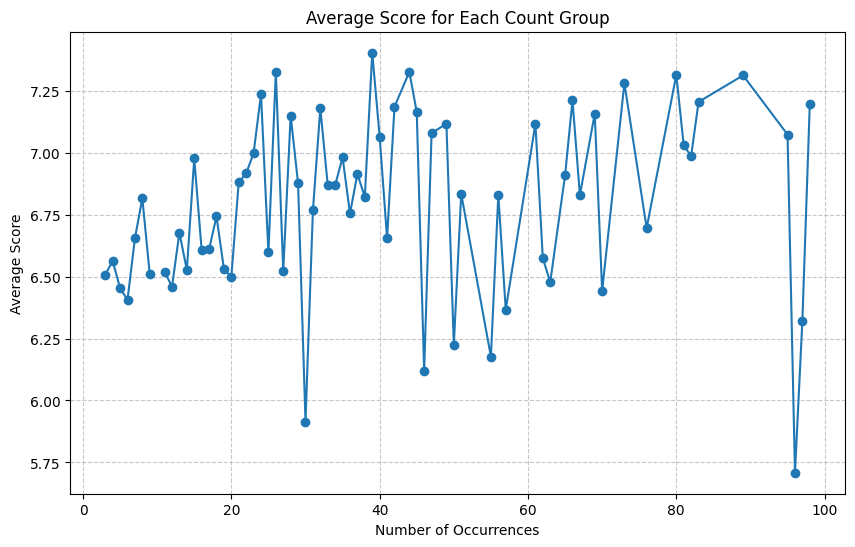

In [473]:
import matplotlib.pyplot as plt

filtered_avg_score_for_count = {count: avg_score for count, avg_score in avg_score_for_count.items() if count <= 100}

# Extract counts and average scores from the filtered dictionary
counts = list(filtered_avg_score_for_count.keys())
avg_scores = list(filtered_avg_score_for_count.values())


plt.figure(figsize=(10, 6))
plt.plot(counts, avg_scores, marker='o', linestyle='-')
plt.xlabel('Number of Occurrences')
plt.ylabel('Average Score')
plt.title('Average Score for Each Count Group')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

I didn't learn lots from this... One could also also look at the avg rating for the producer, but time is flying. Lets say thay have to have been in atleast 20, it might change later. 

In [474]:
#gonna try 60 since it it feels like it cores consistently up, and want a little higher influence on the forest test.
#trying 70
filter_count = 70
filtered_unique_producers = {producer: count for producer, count in unique_producers.items() if count >= filter_count}
print(filtered_unique_producers)
print(len(filtered_unique_producers))

{'NHK': 500, 'TV Tokyo': 424, 'Aniplex': 410, 'Bandai Visual': 401, 'Lantis': 389, 'Fuji TV': 280, 'Movic': 255, 'Pony Canyon': 250, 'Sotsu': 238, 'Dentsu': 229, 'TBS': 216, 'AT-X': 201, 'Kadokawa Shoten': 197, 'DAX Production': 193, 'Pink Pineapple': 193, 'Sanrio': 182, 'Shueisha': 178, 'KlockWorx': 177, 'Kodansha': 161, 'Starchild Records': 159, 'TV Asahi': 157, 'Mainichi Broadcasting System': 157, 'Genco': 149, 'Media Factory': 147, 'VAP': 140, 'Tokyo Movie Shinsha': 130, 'Nihon Ad Systems': 129, 'Sony Music Entertainment': 122, 'Shogakukan Productions': 112, 'Milky Animation Label': 111, 'Geneon Universal Entertainment': 111, 'Frontier Works': 108, 'Showgate': 108, 'Toho': 106, 'Nippon Television Network': 105, 'flying DOG': 98, 'AIC': 97, 'Gakken': 96, 'Studio Jack': 95, 'Shochiku': 89, 'Magic Capsule': 83, 'Tohokushinsha Film Corporation': 82, 'Half H.P Studio': 81, 'Square Enix': 80, 'Tokyo MX': 76, 'Nippon Columbia': 76, 'TV Tokyo Music': 73, 'Group TAC': 70}
48


In [475]:
producers = filtered_unique_producers.keys()
prefix = 'producer_'
for producer in producers:
    producer_ohe[prefix + producer] = False

for index, row in producer_ohe.iterrows():
    for producer in producers:
        if pd.notna(row['producer']) and producer in row['producer']:
            producer_ohe.loc[index, prefix + producer] = True

In [476]:
producer_ohe = producer_ohe.drop(columns=['producer'])

In [477]:
keys_with_prefix = [prefix + producer for producer in producers]
rows_with_true_producers = producer_ohe.loc[producer_ohe.any(axis=1), keys_with_prefix]

rows_with_true_producers

,producer_NHK,producer_TV Tokyo,producer_Aniplex,producer_Bandai Visual,producer_Lantis,producer_Fuji TV,producer_Movic,producer_Pony Canyon,producer_Sotsu,producer_Dentsu,...,producer_Studio Jack,producer_Shochiku,producer_Magic Capsule,producer_Tohokushinsha Film Corporation,producer_Half H.P Studio,producer_Square Enix,producer_Tokyo MX,producer_Nippon Columbia,producer_TV Tokyo Music,producer_Group TAC
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
Seto no Hanayome,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
Shugo Chara!! Doki,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Princess Tutu,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bakuman. 3rd Season,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Minna no Taabou Konnichiwa,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gutchonpa Omoshiro Hanashi,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Geba Geba Shou Time!,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now to studio

In [478]:
import re
def calculate_avg_score_for_count(unique_counts, data_frame, column_name):
    producers_by_count = {}

    for producer, count in unique_counts.items():
        if count in producers_by_count:
            producers_by_count[count].append(producer)
        else:
            producers_by_count[count] = [producer]

    avg_score_for_count = {}

    for count, producers in producers_by_count.items():
        avg_score = 0
        data_frame_cleaned = data_frame.dropna(subset=[column_name])
        for producer in producers:
            escaped_producer = re.escape(producer)
            rows_with_producer = data_frame_cleaned[data_frame_cleaned[column_name].str.contains(escaped_producer)]
            avg_score += rows_with_producer['score'].mean()
        avg_score /= len(producers)
        avg_score_for_count[count] = avg_score

    return avg_score_for_count

again 20, might change later, maybe only top 20

studio
Toei Animation         741
Sunrise                462
Madhouse               346
J.C.Staff              328
Production I.G         299
                      ... 
Fifth Avenue             1
Tomason                  1
Arcs Create              1
Takara Tomy A.R.T.S      1
33 Collective            1
Name: count, Length: 498, dtype: int64


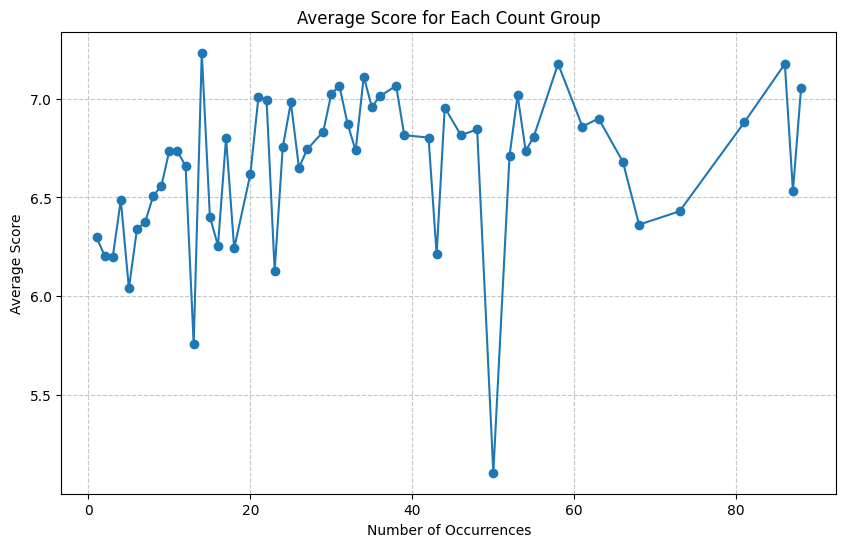

36


In [479]:
studio_ohe = producer_ohe.copy()
studios = studio_ohe['studio'].str.split(', ').explode()
unique_studios = studios.value_counts()
print(unique_studios)

avg_score_studio = calculate_avg_score_for_count(unique_studios, studio_ohe, 'studio')
filtered_avg_score_for_count = {count: avg_score for count, avg_score in avg_score_studio.items() if count <= 100}

counts = list(filtered_avg_score_for_count.keys())
avg_scores = list(filtered_avg_score_for_count.values())
plt.figure(figsize=(10, 6))
plt.plot(counts, avg_scores, marker='o', linestyle='-')
plt.xlabel('Number of Occurrences')
plt.ylabel('Average Score')
plt.title('Average Score for Each Count Group')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()        

#goign to try 35 seems to have made it a little better. Gonna try a little higher, but dont know if its smart to remove all the new/small studios now. But gonna try with after 50
filter_count = 50

prefix = 'studio_'
filtered_unique_studios = {studio: count for studio, count in unique_studios.items() if count >= filter_count}
print(filtered_unique_studios.__len__())

for studio in filtered_unique_studios.keys():
    studio_ohe[prefix + studio] = False

for index, row in studio_ohe.iterrows():
    for studio in filtered_unique_studios.keys():
        if pd.notna(row['studio']) and studio in row['studio']:
            studio_ohe.loc[index, prefix + studio] = True

studio_ohe = studio_ohe.drop(columns=['studio'])

Now for op and ed artists

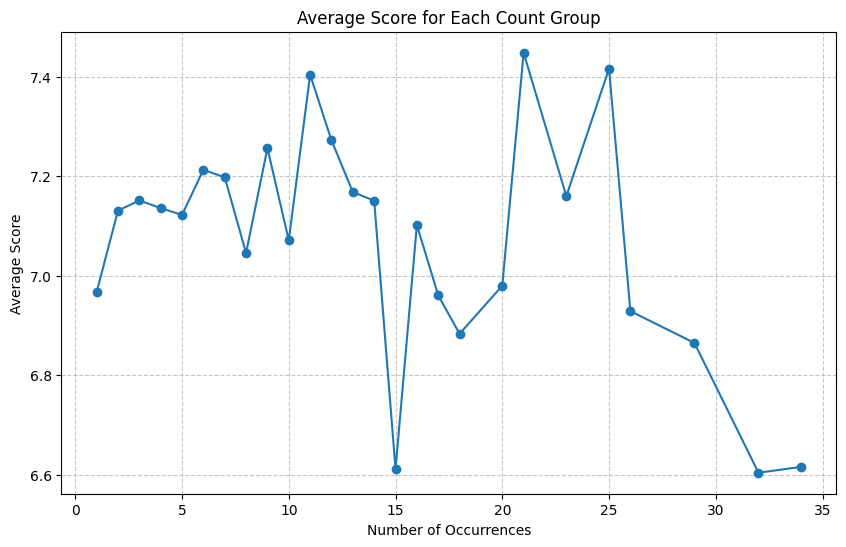

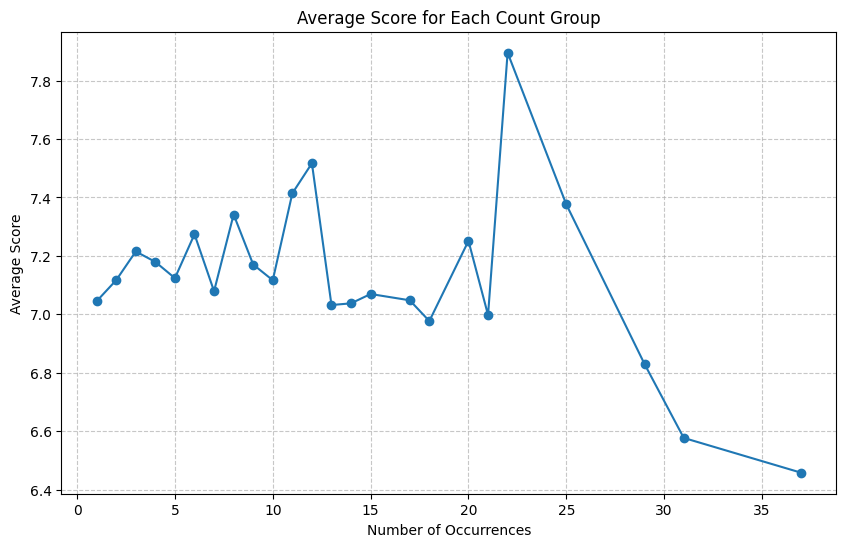

48
38


,op_artist_Columbia Yurikago Kai,op_artist_Mitsuko Horie,op_artist_Hironobu Kageyama,op_artist_Nana Mizuki,op_artist_Maaya Sakamoto,op_artist_Minami Kuribayashi,op_artist_JAM Project,op_artist_ZAQ,op_artist_GRANRODEO,op_artist_Megumi Hayashibara,...,ed_artist_Megumi Nakajima,ed_artist_Ceui,ed_artist_ELISA,ed_artist_Mami Kawada,ed_artist_AiM,ed_artist_Rina Satou,ed_artist_Yui Sakakibara,ed_artist_Yukari Tamura,ed_artist_Miyuki Hashimoto,ed_artist_Azumi Asakura
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Seto no Hanayome,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Shugo Chara!! Doki,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Princess Tutu,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bakuman. 3rd Season,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Minna no Taabou Konnichiwa,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gutchonpa Omoshiro Hanashi,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Geba Geba Shou Time!,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [480]:
artists_ohe = studio_ohe.copy()
op_artists = artists_ohe['op_artists'].str.split(', ').explode()
ed_artists = artists_ohe['ed_artists'].str.split(', ').explode()

unique_op_artists = op_artists.value_counts()
unique_ed_artists = ed_artists.value_counts()

avg_score_op_artists = calculate_avg_score_for_count(unique_op_artists, artists_ohe, 'op_artists')
avg_score_ed_artists = calculate_avg_score_for_count(unique_ed_artists, artists_ohe, 'ed_artists')

filtered_avg_score_for_count_op = avg_score_op_artists
filtered_avg_score_for_count_ed = avg_score_ed_artists

counts_op = list(filtered_avg_score_for_count_op.keys())
avg_scores_op = list(filtered_avg_score_for_count_op.values())

counts_ed = list(filtered_avg_score_for_count_ed.keys())
avg_scores_ed = list(filtered_avg_score_for_count_ed.values())

plt.figure(figsize=(10, 6))
plt.plot(counts_op, avg_scores_op, marker='o', linestyle='-')
plt.xlabel('Number of Occurrences')
plt.ylabel('Average Score')
plt.title('Average Score for Each Count Group')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(counts_ed, avg_scores_ed, marker='o', linestyle='-')
plt.xlabel('Number of Occurrences')
plt.ylabel('Average Score')
plt.title('Average Score for Each Count Group')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


#Keeping it at 10 for now, dont think they have a big importance, but for the check later, i need a few

filter_count = 10
filtered_unique_op_artists = {artist: count for artist, count in unique_op_artists.items() if count >= filter_count}
filtered_unique_ed_artists = {artist: count for artist, count in unique_ed_artists.items() if count >= filter_count}

print(filtered_unique_op_artists.__len__())
print(filtered_unique_ed_artists.__len__())
prefix_op = 'op_artist_'
prefix_ed = 'ed_artist_'

keys_with_prefix_op = [prefix_op + artist for artist in filtered_unique_op_artists.keys()]
keys_with_prefix_ed = [prefix_ed + artist for artist in filtered_unique_ed_artists.keys()]

for artist in filtered_unique_op_artists.keys():
    artists_ohe[prefix_op + artist] = False

for artist in filtered_unique_ed_artists.keys():
    artists_ohe[prefix_ed + artist] = False

for index, row in artists_ohe.iterrows():
    for artist in filtered_unique_op_artists.keys():
        if pd.notna(row['op_artists']) and artist in row['op_artists']:
            artists_ohe.loc[index, prefix_op + artist] = True
    for artist in filtered_unique_ed_artists.keys():
        if pd.notna(row['ed_artists']) and artist in row['ed_artists']:
            artists_ohe.loc[index, prefix_ed + artist] = True

artists_ohe = artists_ohe.drop(columns=['op_artists', 'ed_artists'])

rows_with_true_artists = artists_ohe.loc[artists_ohe.any(axis=1), list(keys_with_prefix_op) + list(keys_with_prefix_ed)]

rows_with_true_artists


In [481]:
#Just checking which columns i havent changed
just_a_check = list(set(ue_data.columns) & set(artists_ohe.columns))
just_a_check

['nr_synonyms',
 'release_season',
 'episodes',
 'rating',
 'min_duration',
 'is_licensed',
 'score']

rating and release_season

In [482]:
final_ohe = artists_ohe.copy()

unique_ratings = final_ohe['rating'].unique()
unique_release_seasons = final_ohe['release_season'].unique()

one_hot_encoder = pd.get_dummies(final_ohe['rating'], prefix='rating')
final_ohe = pd.concat([final_ohe, one_hot_encoder], axis=1)
final_ohe.drop(columns=['rating'], inplace=True)

one_hot_encoder = pd.get_dummies(final_ohe['release_season'], prefix='release_season')
final_ohe = pd.concat([final_ohe, one_hot_encoder], axis=1)
final_ohe.drop(columns=['release_season'], inplace=True)

final_ohe

,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,source_Digital manga,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,rating_Rx - Hentai,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,12,7.63,True,1,24.0,13,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
Seto no Hanayome,26,7.89,True,1,24.0,16,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Shugo Chara!! Doki,51,7.55,True,2,24.0,18,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
Princess Tutu,38,8.21,True,0,16.0,13,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
Bakuman. 3rd Season,25,8.67,True,1,24.0,19,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Minna no Taabou Konnichiwa,1,6.75,False,0,20.0,26,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
Gutchonpa Omoshiro Hanashi,5,5.50,False,0,8.0,26,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
Geba Geba Shou Time!,1,4.60,False,0,25.0,20,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


# Lets do some checks with the data

First check nans and remove or replace

In [483]:
nan_counts = final_ohe.isnull().sum()
columns_with_nans = nan_counts[nan_counts > 0]
print(f"Total NaNs in the dataset: {final_ohe.isnull().sum().sum()}")
print("Columns with NaNs and their counts:")
print(columns_with_nans)

#we are simply gonna remove the rows with NaNs. Not a lot left

final_ohe = final_ohe.dropna()

Total NaNs in the dataset: 132
Columns with NaNs and their counts:
min_duration    132
dtype: int64


## Correlation matrix

In [484]:
import plotly.express as px
import seaborn as sns
import numpy as np
correlation_min = 0.70

correlation_matrix = final_ohe.corr()
np.fill_diagonal(correlation_matrix.values, 0) #removing self-correlation
filtered_corr_matrix = correlation_matrix[((correlation_matrix >= correlation_min) | (correlation_matrix <= -correlation_min))]
filtered_corr_matrix.dropna(how='all', axis=0, inplace=True)
filtered_corr_matrix.dropna(how='all', axis=1, inplace=True)

fig = px.imshow(filtered_corr_matrix, 
                text_auto=True, 
                color_continuous_scale='RdBu_r',
                zmin=-1, zmax=1, 
                aspect="auto")

fig.update_layout(
    title="Filtered Correlation Matrix Heatmap",
    xaxis_title="Variables",
    yaxis_title="Variables"
)
fig.show()


This shows it might be a good idea to either drop or combine some into one column, since they have a high correlation and kind of the same meaning. But first I'll try a simple random forest to see if can come with some insights.

There are a lot less now since I've fiddling with some of the parameters, after reading what random forest said about feature importance. But I think I'll still compine the rating rx and hentai genre since they are so similar.

Mean Squared Error: 0.5851014292761383
R-squared: 0.5461350371108249
                                     feature  importance
225                  ed_artist_Asami Shimoda    0.000004
232                          ed_artist_ELISA    0.000005
239                  ed_artist_Azumi Asakura    0.000006
215                 ed_artist_Ichirou Mizuki    0.000008
189                  op_artist_Sayaka Sasaki    0.000010
..                                       ...         ...
111  producer_Tohokushinsha Film Corporation    0.000227
143                              studio_Arms    0.000244
141                      studio_Silver Link.    0.000253
218                    ed_artist_Nagi Yanagi    0.000261
106                             producer_AIC    0.000264

[100 rows x 2 columns]


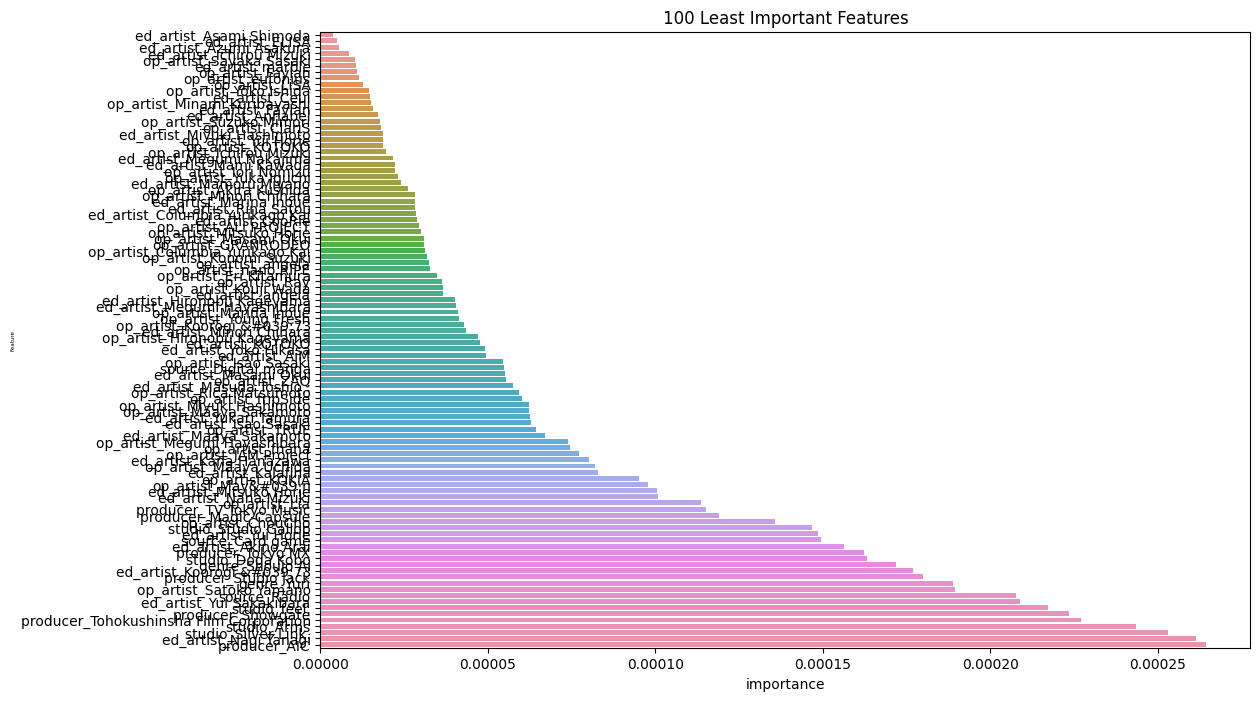

In [485]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

y = final_ohe['score']
X = final_ohe.drop(columns=['score'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

feature_importances = rf_regressor.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importances
}).sort_values(by='importance', ascending=True)

least_important_features = feature_importance_df.head(100)
print(least_important_features)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=least_important_features)
plt.title('100 Least Important Features')
plt.ylabel('Feature', fontsize=4)
plt.show()

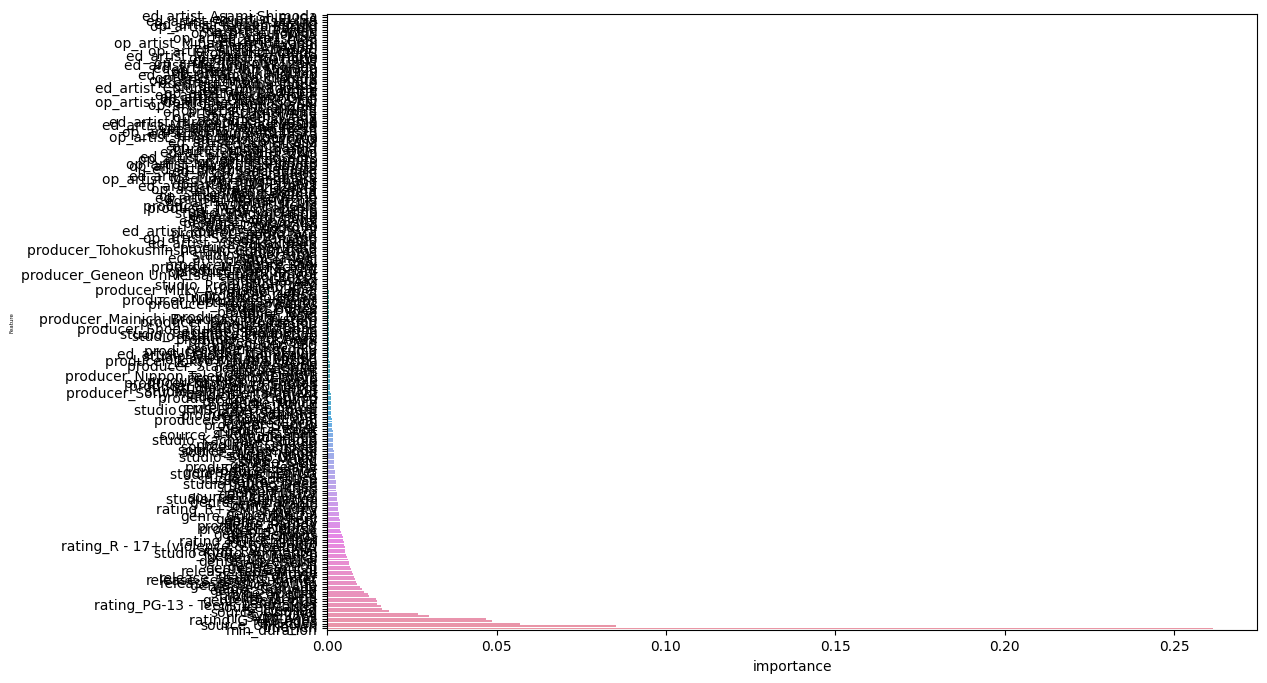

In [486]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.ylabel('Feature', fontsize=4)
plt.show()

                             feature  importance
225          ed_artist_Asami Shimoda    0.000004
232                  ed_artist_ELISA    0.000005
239          ed_artist_Azumi Asakura    0.000006
215         ed_artist_Ichirou Mizuki    0.000008
189          op_artist_Sayaka Sasaki    0.000010
222                 ed_artist_marble    0.000011
180                 op_artist_Faylan    0.000011
175               op_artist_eufonius    0.000011
200                   op_artist_LiSA    0.000013
194            op_artist_Yoko Ishida    0.000014
231                   ed_artist_Ceui    0.000015
159     op_artist_Minami Kuribayashi    0.000015
229                 ed_artist_Faylan    0.000016
228                ed_artist_Annabel    0.000017
197          op_artist_Suzuko Mimori    0.000018
176                 op_artist_ClariS    0.000018
238       ed_artist_Miyuki Hashimoto    0.000019
181              op_artist_Yui Horie    0.000019
196                 op_artist_KOTOKO    0.000019
164         op_artis

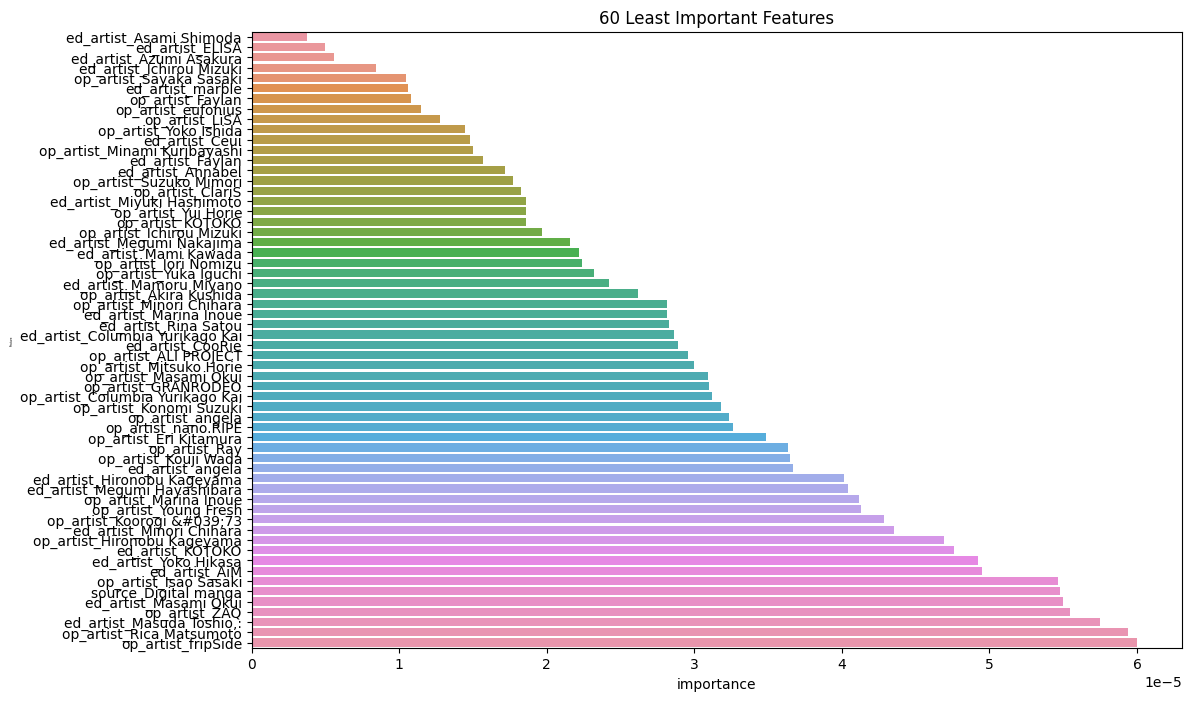

In [487]:
least_important_features = feature_importance_df.head(60)
print(least_important_features)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=least_important_features)
plt.title('60 Least Important Features')
plt.ylabel('Feature', fontsize=2)
plt.show()

                                   feature  importance
124                     studio_Studio Deen    0.002474
119                         studio_Sunrise    0.002517
29                              genre_Cars    0.002521
40                            genre_Horror    0.002568
46                          genre_Military    0.002739
10                      source_Light novel    0.002745
118                  studio_Toei Animation    0.002769
44                      genre_Martial Arts    0.002826
43                             genre_Magic    0.003106
12                            source_Music    0.003137
244                rating_R+ - Mild Nudity    0.003152
26                                 type_TV    0.003308
45                             genre_Mecha    0.003326
65                      genre_Supernatural    0.003331
48                           genre_Mystery    0.003337
54                            genre_School    0.003675
49                            genre_Parody    0.003760
72        

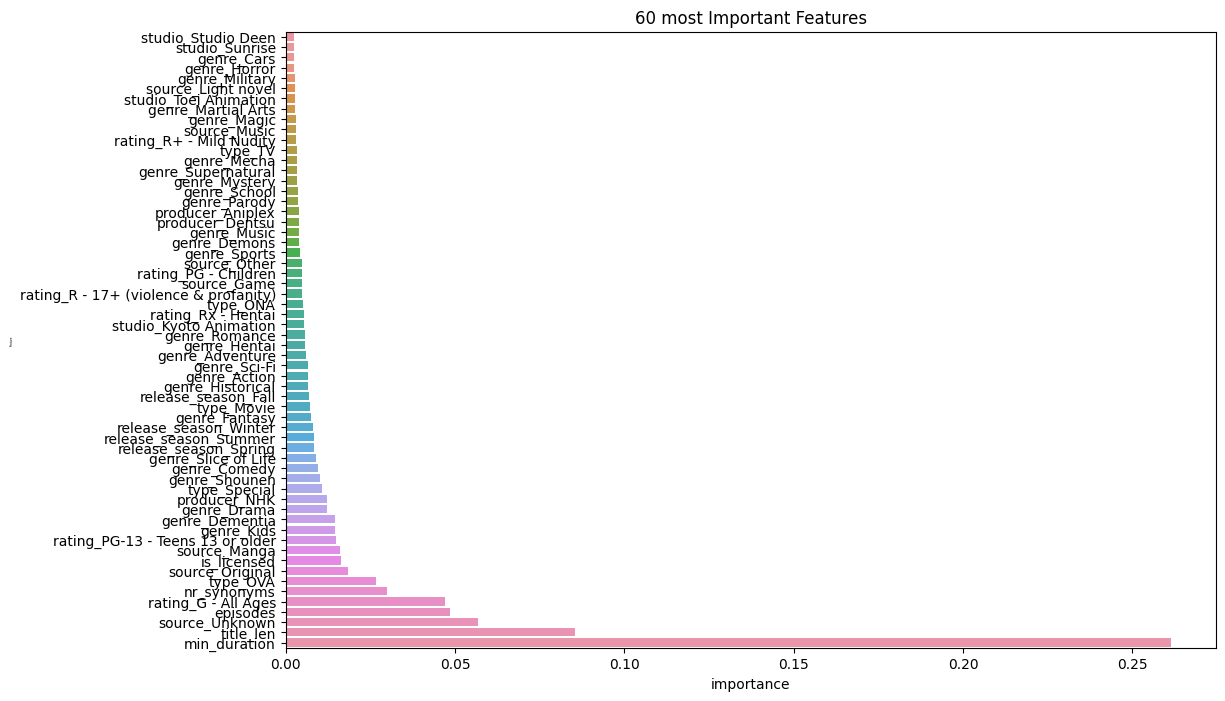

In [488]:
least_important_features = feature_importance_df.tail(60)
print(least_important_features)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=least_important_features)
plt.title('60 most Important Features')
plt.ylabel('Feature', fontsize=2)
plt.show()

So, lets check how big the correlation is between feature importance shown here and the old features. Genre and so on

In [489]:
#first time i ran though, from this i feel confident in that ed and op doesnt have a big impact. They almost filed up the least important and none in most. Plus didnt personally think they would have a big impact 
# producer studio might have bigger impact if i include less. 
#            prefix  importance    
#2       op_artist_    0.000057
#0       ed_artist_    0.000058
#4        producer_    0.000419
#8          studio_    0.000529
#1           genre_    0.003954
#7          source_    0.007213
#6  release_season_    0.007542
#9            type_    0.009151
#5          rating_    0.013262
#3            other    0.086195


#second time
#            prefix  importance
#2       op_artist_    0.000059
#0       ed_artist_    0.000071
#8          studio_    0.000790
#4        producer_    0.000870
#1           genre_    0.004058
#7          source_    0.007302
#6  release_season_    0.007871
#9            type_    0.009212
#5          rating_    0.013349
#3            other    0.087762

In [490]:
prefixes = ['source_', 'type_', 'genre_', 'producer_', 'studio_', 'op_artist_', 'ed_artist_', 'rating_', 'release_season_']
feature_importance_df_copy = feature_importance_df.copy()

feature_importance_df['prefix'] = feature_importance_df['feature'].apply(lambda x: next((p for p in prefixes if x.startswith(p)), 'other'))
average_importance_df = feature_importance_df.groupby('prefix').agg({'importance': 'mean'}).reset_index()

print(average_importance_df.sort_values(by='importance'))




            prefix  importance
2       op_artist_    0.000064
0       ed_artist_    0.000074
4        producer_    0.001058
8          studio_    0.001092
1           genre_    0.004139
7          source_    0.007343
6  release_season_    0.007900
9            type_    0.009246
5          rating_    0.013307
3            other    0.088330


Happy with this for now. Lets remove the ed and op artists. I haven't tried to fit the random forest model in this case, just wanted some insights, so don't want to remove to much.

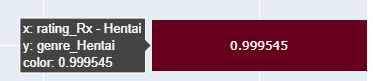

In [491]:
final_cleaning = final_ohe.copy()

columns_to_drop = final_cleaning.columns[final_cleaning.columns.str.startswith(('op_artist_', 'ed_artist_'))]
final_cleaning = final_cleaning.drop(columns=columns_to_drop)

final_cleaning["Hentai"] = False

for index, row in final_cleaning.iterrows():
    rating_Rx_Hentai = bool(row['rating_Rx - Hentai'])
    genre_Hentai = bool(row['genre_Hentai'])
    final_cleaning.loc[index, 'Hentai'] = rating_Rx_Hentai or genre_Hentai
final_cleaning = final_cleaning.drop(columns=['rating_Rx - Hentai', 'genre_Hentai'])

print(final_cleaning['Hentai'])

final_cleaning.to_csv('DataPrepared.csv')

final_cleaning

title
Inu x Boku SS                            False
Seto no Hanayome                         False
Shugo Chara!! Doki                       False
Princess Tutu                            False
Bakuman. 3rd Season                      False
                                         ...  
Minna no Taabou Konnichiwa               False
Gutchonpa Omoshiro Hanashi               False
Geba Geba Shou Time!                     False
Nippon Mukashibanashi: Sannen Netarou    False
Senjou no Valkyria Special               False
Name: Hentai, Length: 13954, dtype: bool


,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,source_Digital manga,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,12,7.63,True,1,24.0,13,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
Seto no Hanayome,26,7.89,True,1,24.0,16,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
Shugo Chara!! Doki,51,7.55,True,2,24.0,18,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
Princess Tutu,38,8.21,True,0,16.0,13,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Bakuman. 3rd Season,25,8.67,True,1,24.0,19,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Minna no Taabou Konnichiwa,1,6.75,False,0,20.0,26,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
Gutchonpa Omoshiro Hanashi,5,5.50,False,0,8.0,26,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
Geba Geba Shou Time!,1,4.60,False,0,25.0,20,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
